In [16]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import corner
%matplotlib inline

In [48]:
data_HMC = np.load('../data/chains_HMC.npz')
data_gaussian = np.load('../data/chains_emcee.npz')
print(data_HMC.files)
HMC_bestchain = data_HMC['chains'][np.argmax(data_HMC['log_prob'][:,-1])]
# gaussian_bestchain = data_gaussian['chains'][np.argmax(data_gaussian['log_prob'][:,-1])]
gaussian_bestchain = data_gaussian['chains']
# list(data_gaussian.keys())

['chains', 'log_prob', 'local_accs', 'global_accs']


In [43]:
print(list(data_gaussian.keys()))

['chains']


In [44]:
data_HMC['chains'].shape
# gaussian_bestchain.shape
gaussian_bestchain.shape

(1000, 7)

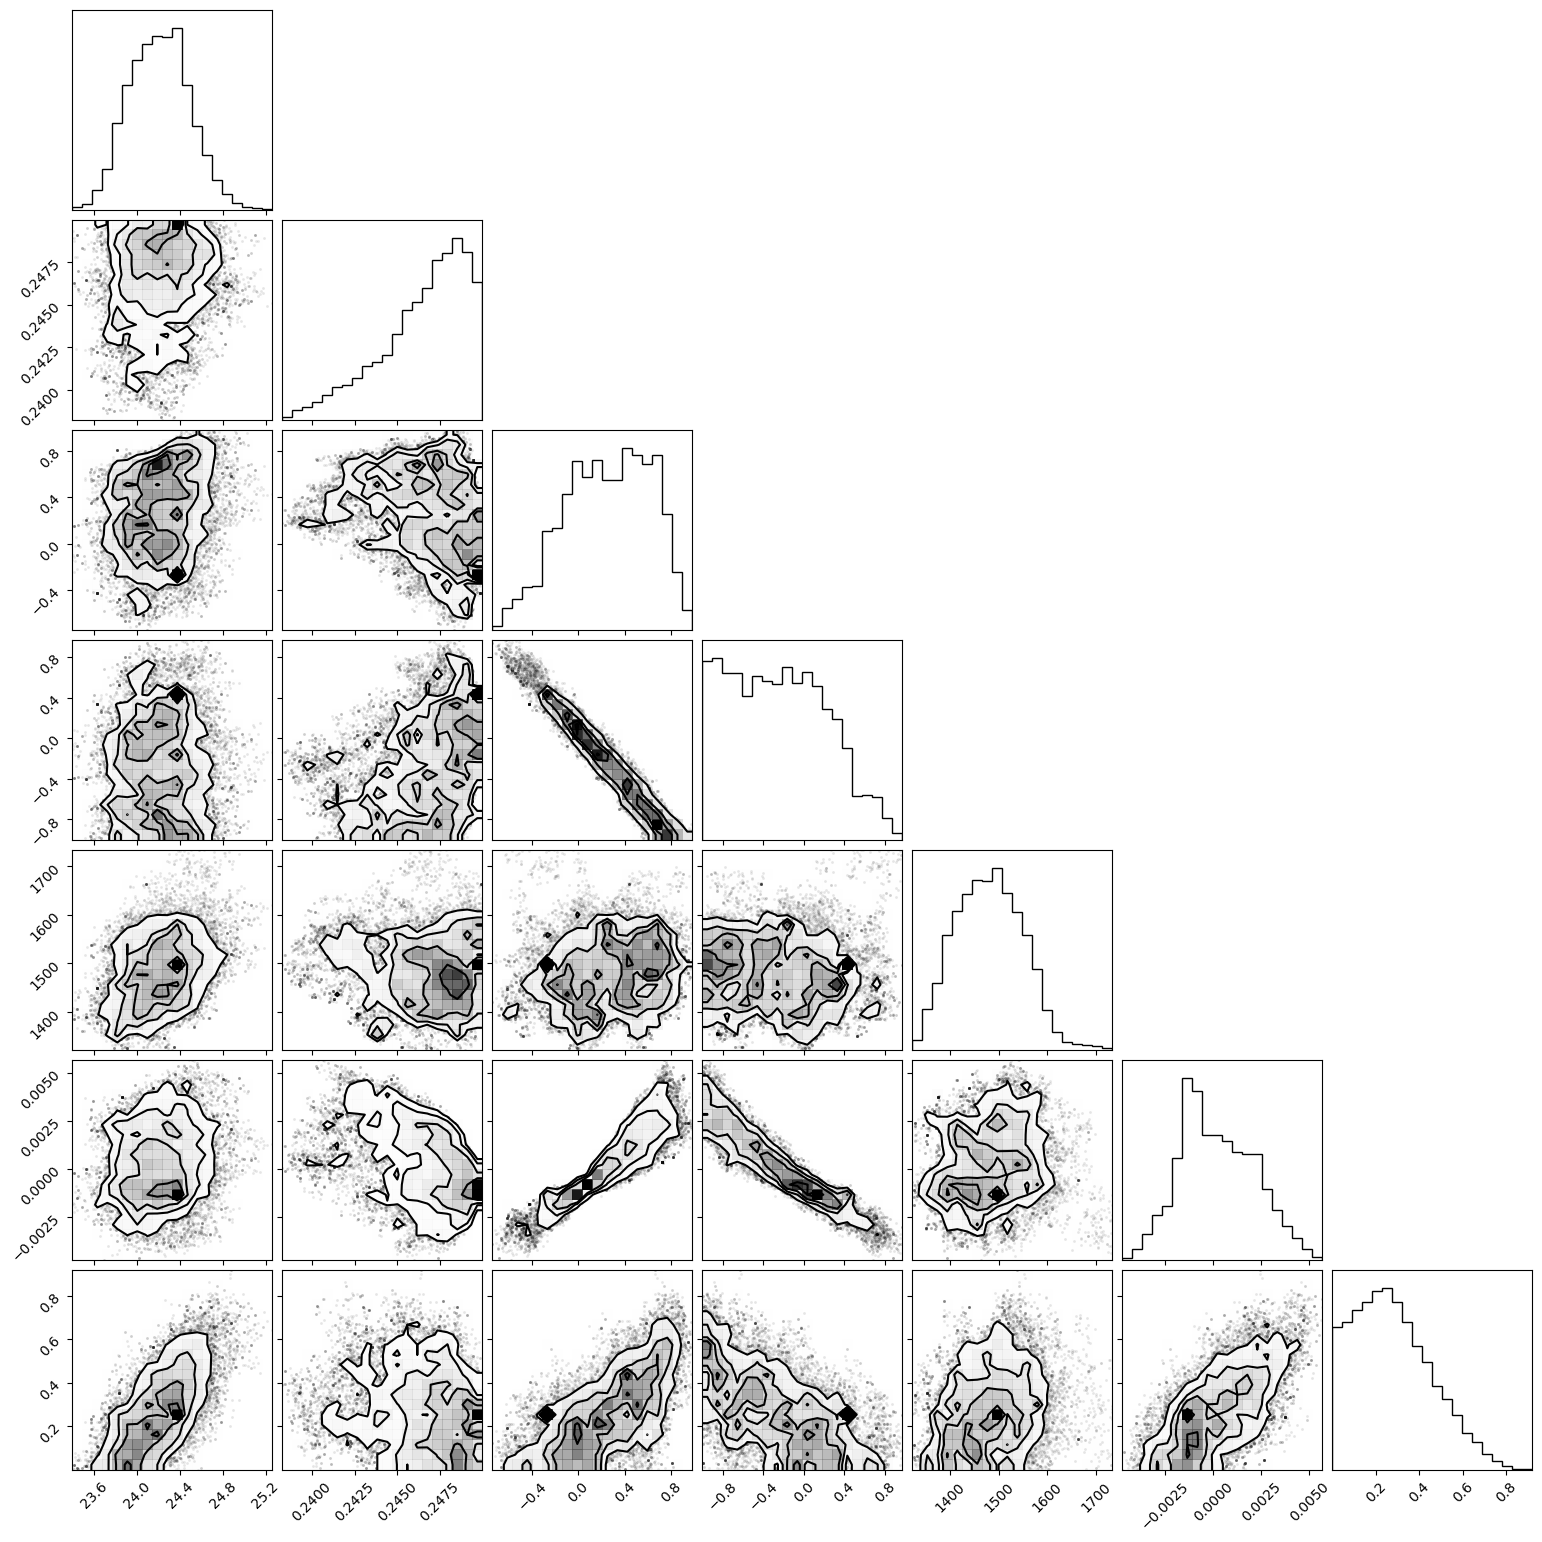

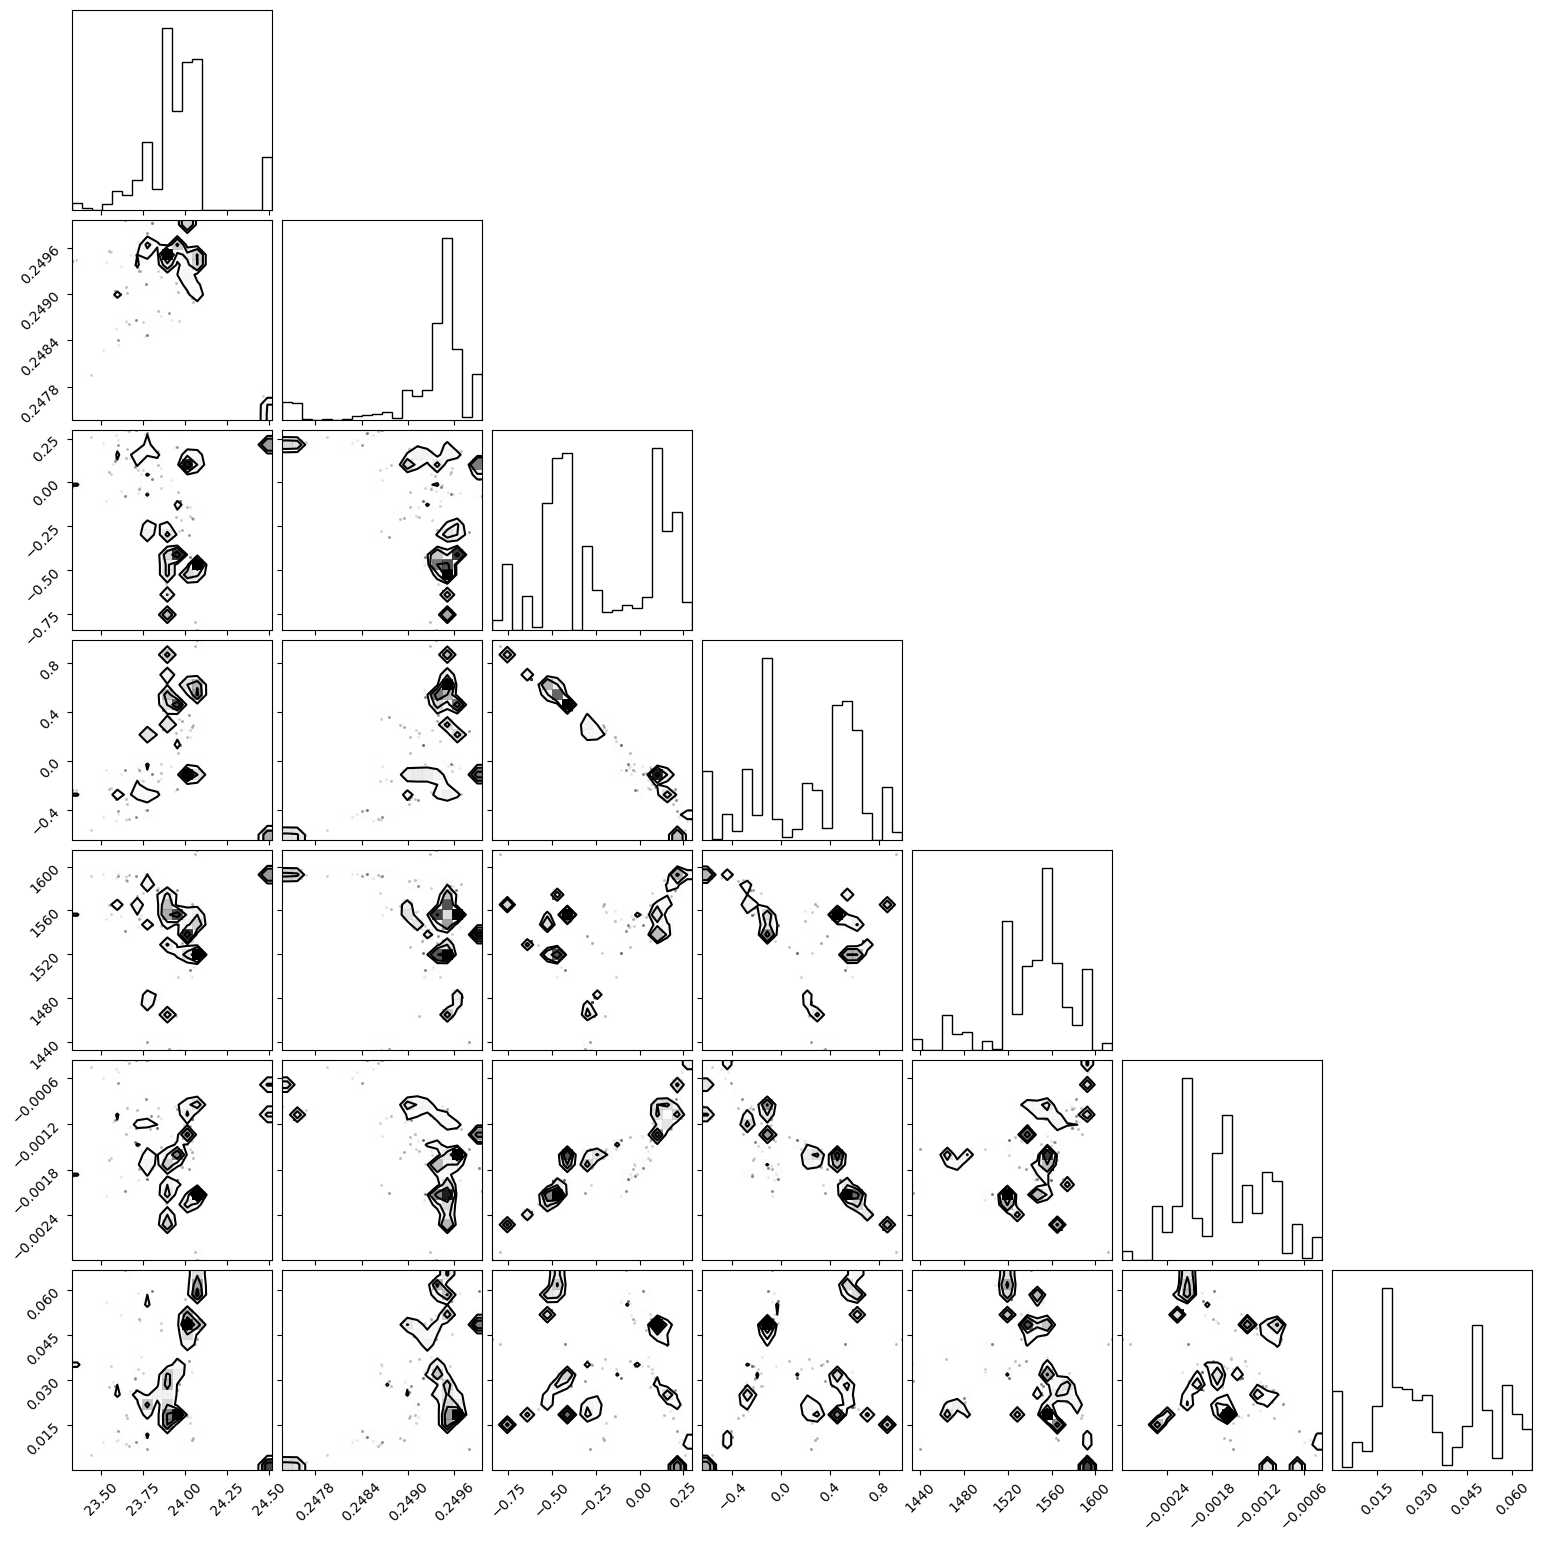

In [22]:
fig_HMC = corner.corner(HMC_bestchain)
fig_gaussian = corner.corner(gaussian_bestchain)

In [54]:
acl_HMC = az.autocorr(HMC_bestchain.T).T
acl_gaussian = []
for i in range(30):
    acl_gaussian.append(az.autocorr(gaussian_bestchain[:,i,:].T).T)

acl_gaussian = np.array(acl_gaussian)
# acl_gaussian = az.autocorr(gaussian_bestchain.T).T
print(acl_HMC.shape, acl_gaussian.shape)

(20000, 7) (30, 1000, 7)


In [55]:
HMC_bestchain.shape
# gaussian_bestchain[:,i,:].shape

(20000, 7)

Text(0, 0.5, 'Autocorrelation')

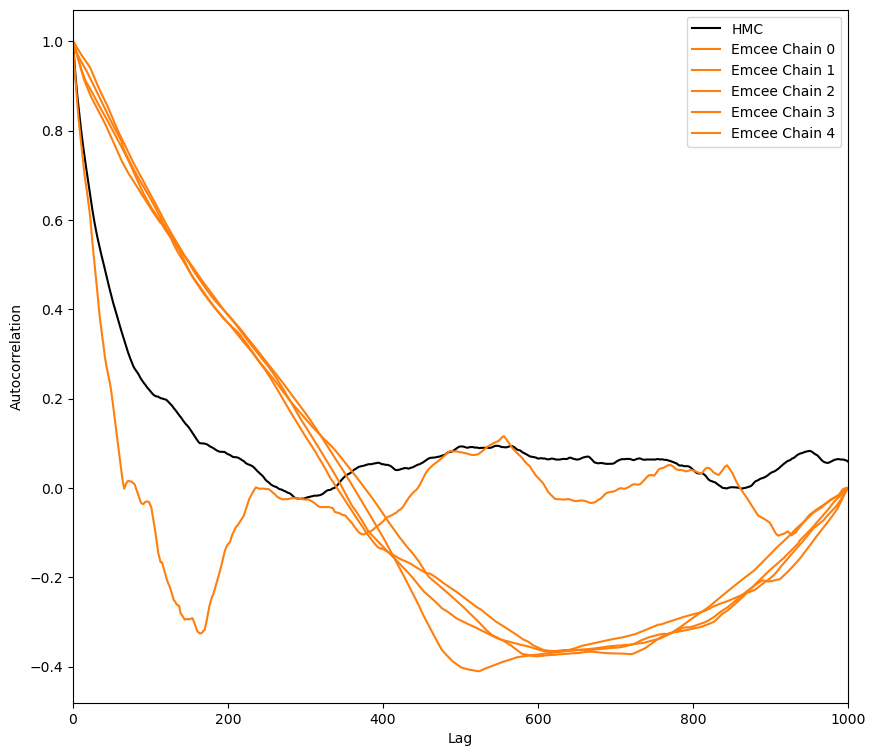

In [61]:
plt.figure(figsize=(10,9))
plt.plot(acl_HMC[:,0], label='HMC', color="k")
# plt.plot(acl_gaussian[:,0], label='Gaussian')
for i in range(5):
    plt.plot(acl_gaussian[i,:,0], label=f'Emcee Chain {i}', color="C1")
plt.xlim(0,1000)
plt.legend()
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

In [62]:
for i in range(7):
    print(az.ess(HMC_bestchain[:,i])/ az.ess(gaussian_bestchain[0,:,i]))

5.401239169198541
1.381065774390975
0.7094441523353341
0.9846621784952796
0.163135131501471
1.2738472529917841
1.265419043917302
